In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("weatherAUS11.csv")
df.head().T

0           1           2           3           4
Date           01-01-2009  02-01-2009  03-01-2009  04-01-2009  05-01-2009
Location           Albury      Albury      Albury      Albury      Albury
MinTemp              11.3         9.6        10.5        12.3        12.9
MaxTemp              26.5        23.9        28.8        34.6        35.8
Rainfall                0           0           0           0           0
Evaporation             0           0           0           0           0
Sunshine                0           0           0           0           0
WindGustDir           WNW           W         SSE         WNW         WNW
WindGustSpeed          56          41          26          37          41
WindDir9am              W         WSW         SSE         SSE         ENE
WindDir3pm            WNW         SSW           E          NW          NW
WindSpeed9am           19          19          11           6           6
WindSpeed3pm           31          11           7          17          26
Humidity9am            46          44          43          41          41
Humidity3pm            26          22          22          12           9
Pressure9am        1004.5      1014.4      1018.7      1015.1      1012.6
Pressure3pm        1003.2      1013.1      1014.8      1010.3      1009.2
Cloud9am                0           0           0           0           0
Cloud3pm                0           0           0           0           0
Temp9am              19.7        14.9        17.1        20.7        22.4
Temp3pm              25.7        22.1        26.5        33.9        34.4
RainToday              No          No          No          No          No
RainTomorrow           No          No          No          No          No

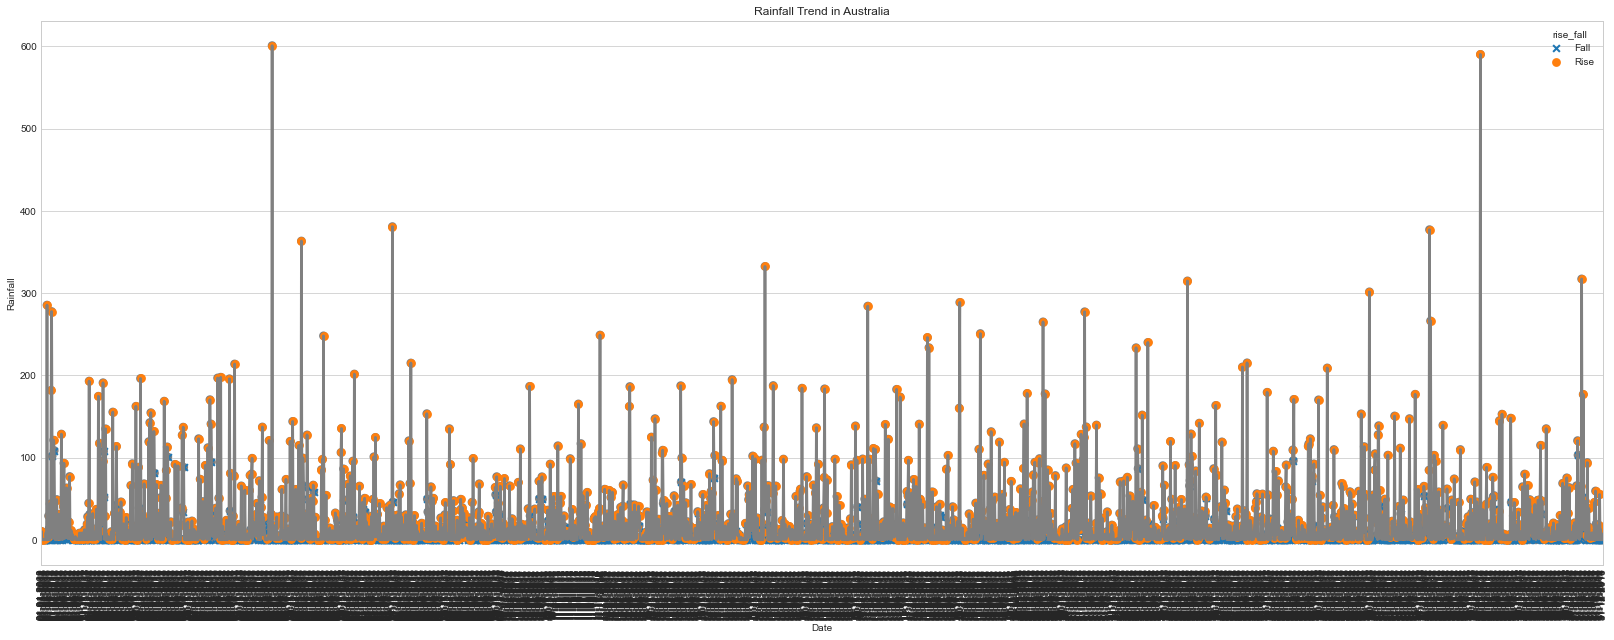

In [3]:
yearly_rainfall = df.groupby(['Date']).sum()
yearly_rainfall['rise_fall'] = np.where(yearly_rainfall['Rainfall'] > yearly_rainfall['Rainfall'].shift(1), "Rise", "Fall")
year = yearly_rainfall.index
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(28, 10))

ax = sns.pointplot(x=year, y="Rainfall", data=yearly_rainfall, color='grey')
ax = sns.pointplot(x=year, y="Rainfall", data=yearly_rainfall,hue='rise_fall', markers=["x", "o"], join=False)
ax = plt.xticks(rotation=90)
ax = plt.title('Rainfall Trend in Australia')

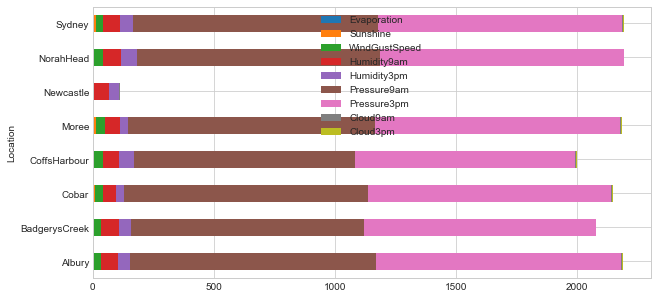

In [4]:
df[['Location', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm',]].groupby("Location").mean().plot.barh(stacked=True,figsize=(10,5));
plt.show()

In [5]:
df.drop(['Date','Location','Evaporation','Sunshine','WindGustDir','WindDir9am', 'WindDir3pm',], axis=1, inplace=True)
df.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     11.3     26.5       0.0             56            19            31   
1      9.6     23.9       0.0             41            19            11   
2     10.5     28.8       0.0             26            11             7   
3     12.3     34.6       0.0             37             6            17   
4     12.9     35.8       0.0             41             6            26   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0           46           26       1004.5       1003.2         0         0   
1           44           22       1014.4       1013.1         0         0   
2           43           22       1018.7       1014.8         0         0   
3           41           12       1015.1       1010.3         0         0   
4           41            9       1012.6       1009.2         0         0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     19.7     25.7        No           No  
1     14.9     22.1        No           No  
2     17.1     26.5        No           No  
3     20.7     33.9        No           No  
4     22.4     34.4        No           No

In [6]:
df.fillna(df.mean(),inplace=True)

In [7]:
df.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     11.3     26.5       0.0             56            19            31   
1      9.6     23.9       0.0             41            19            11   
2     10.5     28.8       0.0             26            11             7   
3     12.3     34.6       0.0             37             6            17   
4     12.9     35.8       0.0             41             6            26   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0           46           26       1004.5       1003.2         0         0   
1           44           22       1014.4       1013.1         0         0   
2           43           22       1018.7       1014.8         0         0   
3           41           12       1015.1       1010.3         0         0   
4           41            9       1012.6       1009.2         0         0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     19.7     25.7        No           No  
1     14.9     22.1        No           No  
2     17.1     26.5        No           No  
3     20.7     33.9        No           No  
4     22.4     34.4        No           No

In [8]:
df.RainToday=[1 if each== 'Yes' else 0 for each in df.RainToday]
df.RainTomorrow=[1 if each== 'Yes' else 0 for each in df.RainTomorrow]

In [9]:
df.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     11.3     26.5       0.0             56            19            31   
1      9.6     23.9       0.0             41            19            11   
2     10.5     28.8       0.0             26            11             7   
3     12.3     34.6       0.0             37             6            17   
4     12.9     35.8       0.0             41             6            26   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0           46           26       1004.5       1003.2         0         0   
1           44           22       1014.4       1013.1         0         0   
2           43           22       1018.7       1014.8         0         0   
3           41           12       1015.1       1010.3         0         0   
4           41            9       1012.6       1009.2         0         0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  
0     19.7     25.7          0             0  
1     14.9     22.1          0             0  
2     17.1     26.5          0             0  
3     20.7     33.9          0             0  
4     22.4     34.4          0             0

In [10]:
y= df.RainTomorrow.values
x_data=df.drop('RainTomorrow',axis=1)
x_data.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     11.3     26.5       0.0             56            19            31   
1      9.6     23.9       0.0             41            19            11   
2     10.5     28.8       0.0             26            11             7   
3     12.3     34.6       0.0             37             6            17   
4     12.9     35.8       0.0             41             6            26   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0           46           26       1004.5       1003.2         0         0   
1           44           22       1014.4       1013.1         0         0   
2           43           22       1018.7       1014.8         0         0   
3           41           12       1015.1       1010.3         0         0   
4           41            9       1012.6       1009.2         0         0   

   Temp9am  Temp3pm  RainToday  
0     19.7     25.7          0  
1     14.9     22.1          0  
2     17.1     26.5          0  
3     20.7     33.9          0  
4     22.4     34.4          0

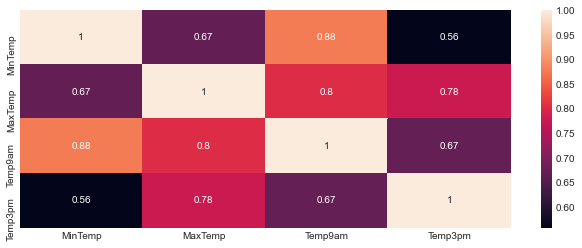

In [11]:
plt.figure(figsize=(11,4))
sns.heatmap(df[['MinTemp','MaxTemp','Temp9am','Temp3pm']].corr(),annot=True)
plt.show()

In [12]:
x_data.describe()

MinTemp       MaxTemp      Rainfall  WindGustSpeed  WindSpeed9am  \
count  24097.000000  24097.000000  24097.000000   24097.000000  24097.000000   
mean      12.900041     23.829315      2.676541      31.006059     12.051625   
std        6.112978      6.769739      9.777875      18.847076      8.907508   
min       -3.300000      0.000000      0.000000       0.000000      0.000000   
25%        8.400000     19.300000      0.000000      22.000000      6.000000   
50%       13.300000     23.600000      0.000000      33.000000     11.000000   
75%       17.900000     28.000000      0.600000      43.000000     19.000000   
max       29.700000     47.300000    371.000000     135.000000    130.000000   

       WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am   Pressure3pm  \
count  24097.000000  24097.000000  24097.000000  24097.000000  24097.000000   
mean      15.770967     67.588662     48.632942    865.863020    863.746591   
std        9.611254     20.285028     23.200298    363.347759    362.281836   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        9.000000     56.000000     32.000000   1010.400000   1007.800000   
50%       15.000000     69.000000     50.000000   1016.800000   1014.200000   
75%       20.000000     82.000000     65.000000   1021.900000   1019.200000   
max       83.000000    100.000000    100.000000   1039.900000   1036.800000   

           Cloud9am      Cloud3pm       Temp9am       Temp3pm     RainToday  
count  24097.000000  24097.000000  24097.000000  24097.000000  24097.000000  
mean       2.343487      2.402789     17.560020     21.681707      0.213761  
std        3.046099      2.961213      5.921204      7.486046      0.409969  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000     13.500000     17.600000      0.000000  
50%        1.000000      1.000000     18.100000     21.800000      0.000000  
75%        5.000000      5.000000     22.000000     26.200000      0.000000  
max        9.000000      8.000000     37.700000     46.700000      1.000000

In [13]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.442424  0.560254       0.0       0.414815      0.146154      0.373494   
1  0.390909  0.505285       0.0       0.303704      0.146154      0.132530   
2  0.418182  0.608879       0.0       0.192593      0.084615      0.084337   
3  0.472727  0.731501       0.0       0.274074      0.046154      0.204819   
4  0.490909  0.756871       0.0       0.303704      0.046154      0.313253   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         0.46         0.26     0.965958     0.967593       0.0       0.0   
1         0.44         0.22     0.975478     0.977141       0.0       0.0   
2         0.43         0.22     0.979613     0.978781       0.0       0.0   
3         0.41         0.12     0.976152     0.974441       0.0       0.0   
4         0.41         0.09     0.973747     0.973380       0.0       0.0   

    Temp9am   Temp3pm  RainToday  
0  0.522546  0.550321        0.0  
1  0.395225  0.473233        0.0  
2  0.453581  0.567452        0.0  
3  0.549072  0.725910        0.0  
4  0.594164  0.736617        0.0

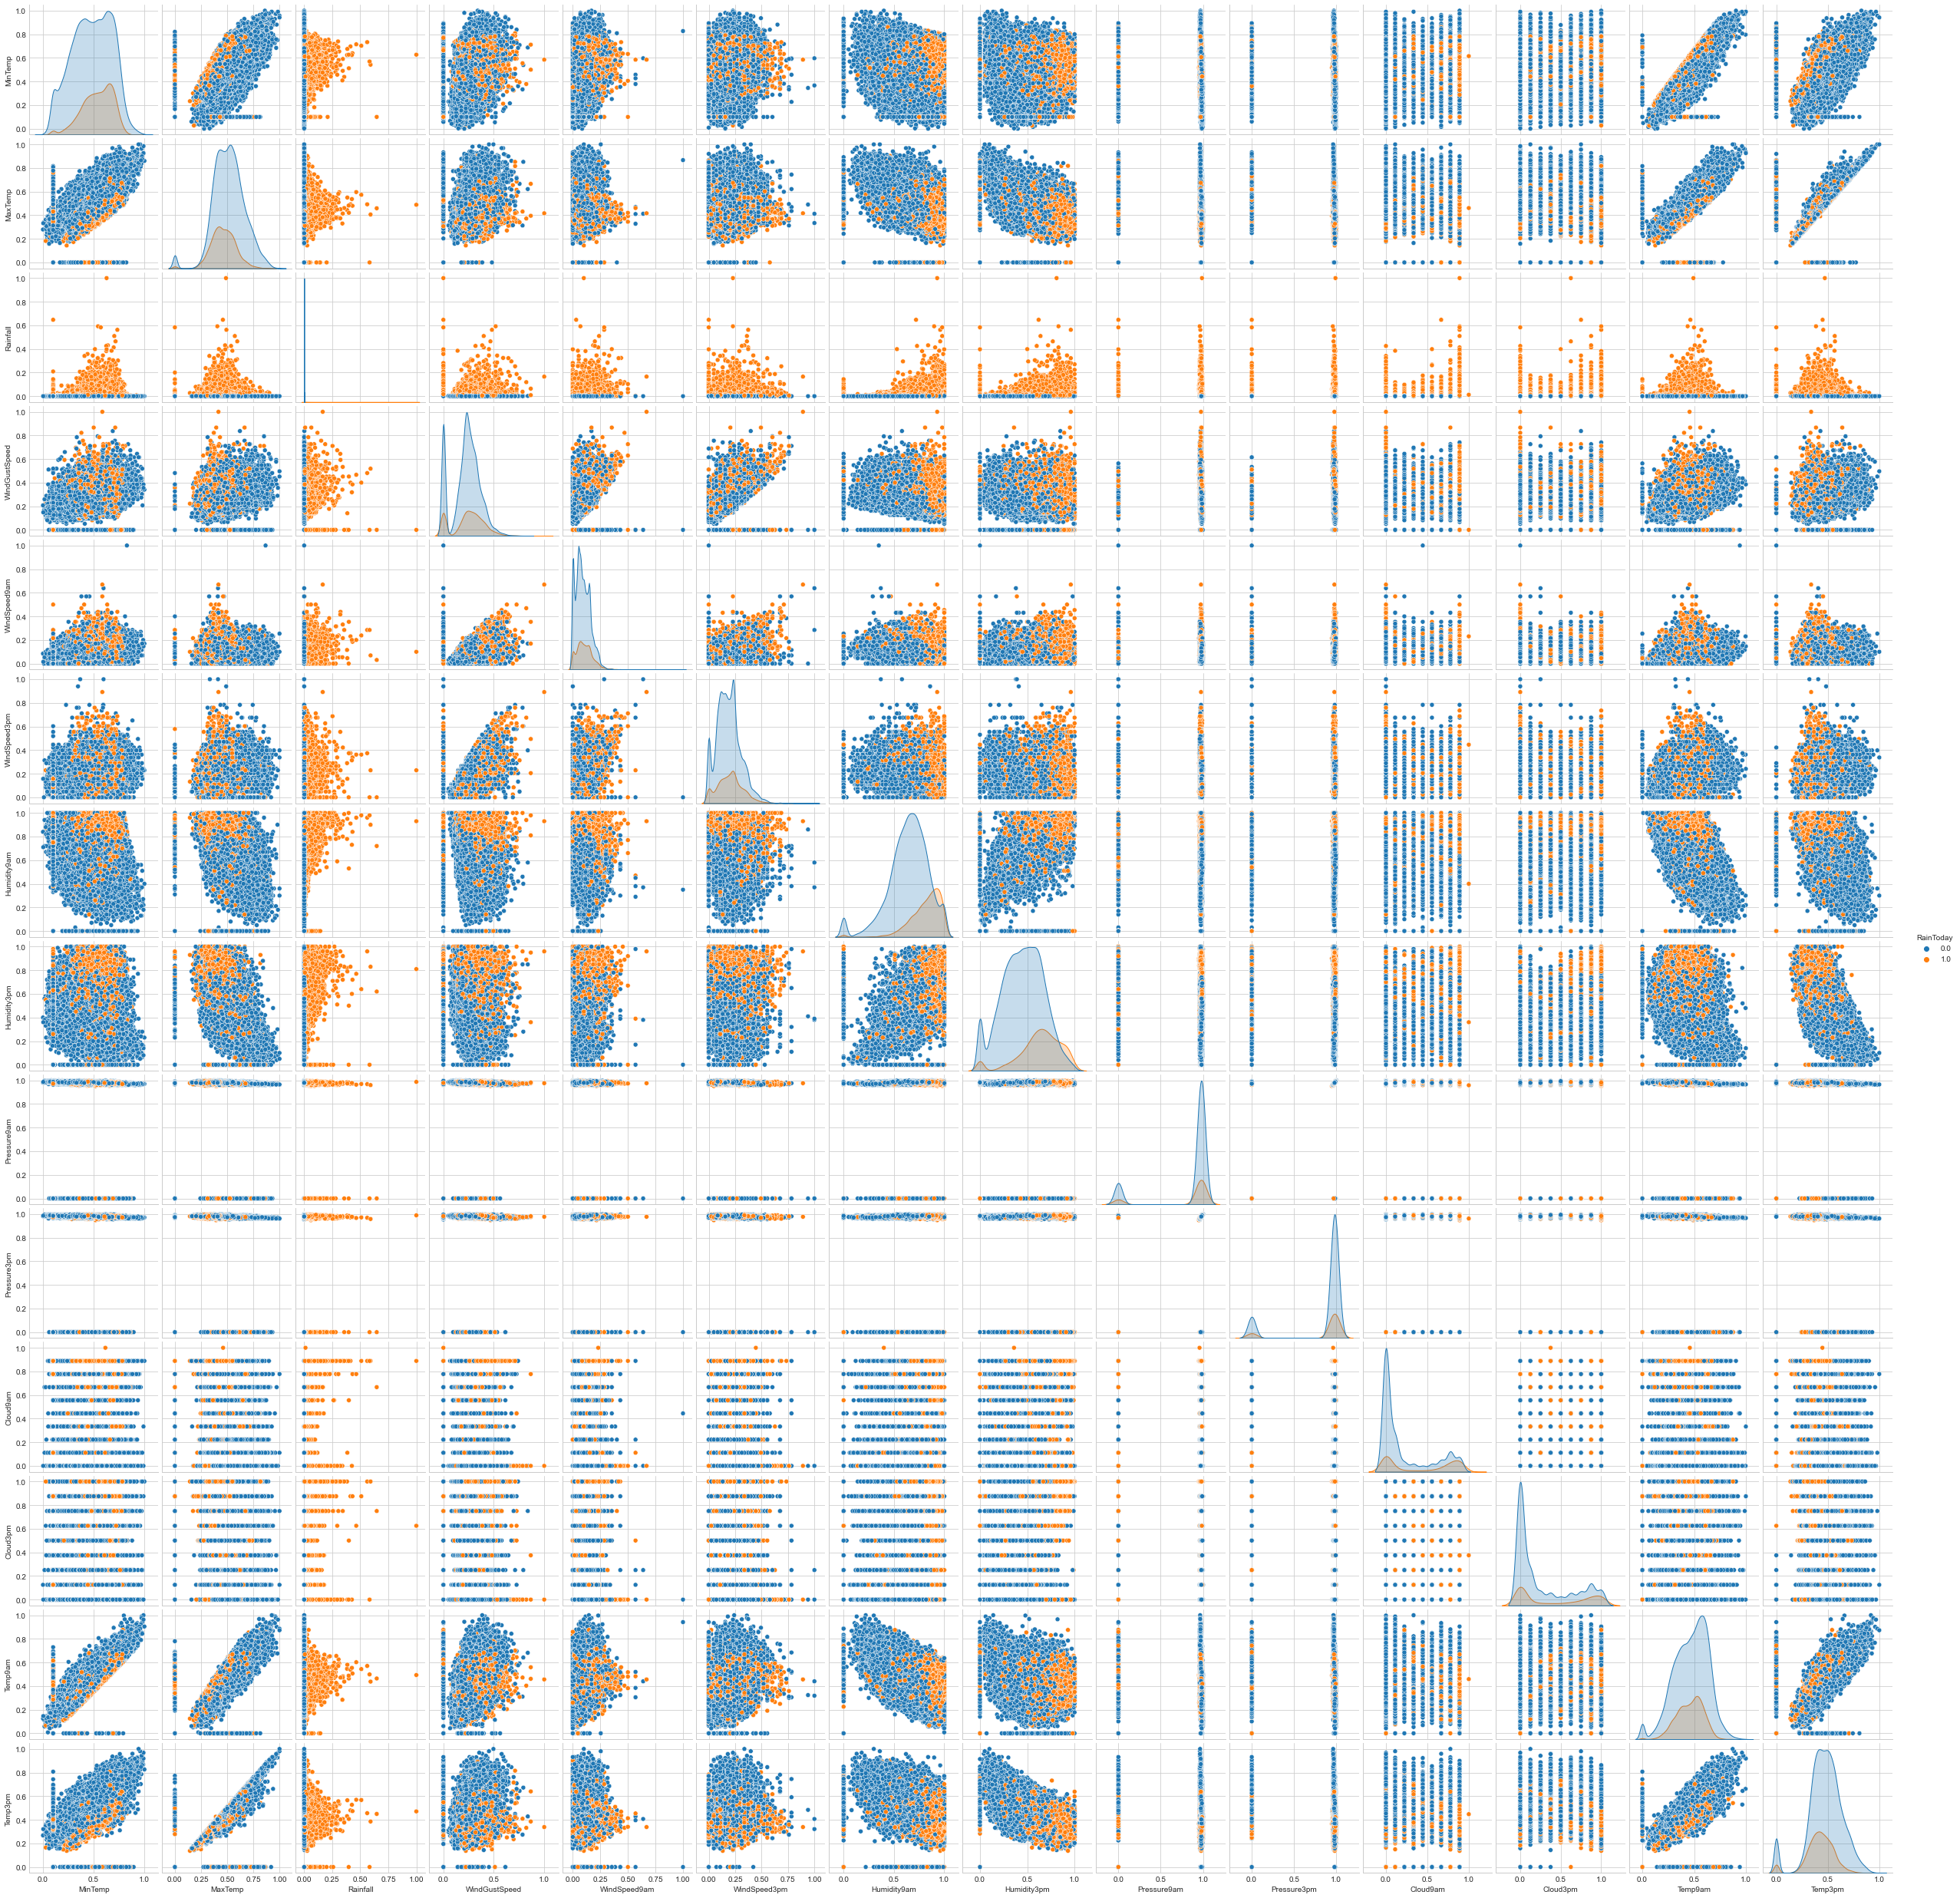

In [14]:
sns.pairplot(x ,hue='RainToday')

## **Logistic Regression**

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['MinTemp','MaxTemp','Rainfall',
                                                             'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
                                                             'Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']],df["RainTomorrow"], test_size=0.2, random_state=105)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( max_iter=1100)
model.fit(x_train ,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1100)

In [17]:
predictions = model.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3836
           1       0.71      0.44      0.54       984

    accuracy                           0.85      4820
   macro avg       0.79      0.70      0.73      4820
weighted avg       0.84      0.85      0.83      4820



## ***Final Accuracy***

In [19]:
print('Test accuracy of sklearn logistic regression library: {}'.format(model.score(x_test, y_test)))

Test accuracy of sklearn logistic regression library: 0.8485477178423236


## **Support Vector Machine (SVM)**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']],df["RainTomorrow"],test_size=0.3, random_state=42)

In [21]:
from sklearn.svm import SVC
model = SVC()

In [22]:
from sklearn.model_selection import train_test_split
model.fit(X_train, y_train)

SVC()

In [23]:
model.score(X_test, y_test)

0.7852005532503458

## ****Tune Parameters****

### ***1.Regularization***

In [24]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7852005532503458

In [25]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.8333333333333334

### ***2.Gamma***

In [26]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.7816044260027663

### ***3.Kernel***

In [27]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
model_linear_kernal.score(X_test, y_test)

0.8348547717842324

In [29]:
y_pred = model.predict(X_test)

## ***Final Accuracy***

In [30]:
print('Test accuracy of sklearn SVM library: {}'.format(model.score(X_test, y_test)))

Test accuracy of sklearn SVM library: 0.7852005532503458
